# Analysing a portfolio of assets based in UK energy and financial markets with investment recommendations

This project evaluates a diversified investment portfolio consisting of UK energy and financial stocks (BP, Shell, HSBC, Barclays), ETFs (FTSE 100, S&P 500), and UK 10-year government bonds. Historical price data and macroeconomic indicators, including GDP, commodity prices were collected, cleaned, and queried using SQL for filtering.

### Package Imports

In [4]:
from dotenv import load_dotenv
import yfinance as yf
import pandas as pd
from fredapi import Fred
import pandasql as ps
from pandasql import sqldf
import requests
import statistics
import math
import numpy as np
import os

### Data Extraction

In [5]:
# UK Energy Markeys
bp = yf.Ticker('BP')
shell = yf.Ticker('SHEL')

# UK Financial Markets
hsbc = yf.Ticker('HSBC')
barclays = yf.Ticker('BARC.L')

# UK / Global ETFs
ftse_100 = yf.Ticker('^FTSE')
s_and_p_500 = yf.Ticker('^GSPC')

# UK 10 Year Gilt Government Bond
load_dotenv()
fred_api_key = os.getenv('FRED_API_KEY')
fred = Fred(fred_api_key)

bond_yield_data = fred.get_series('IRLTLT01GBM156N')

# UK Unemployment
uk_unemployment = fred.get_series('LRUNTTTTGBQ156S')

# UK Consumer Price Index (CPI)
uk_cpi = fred.get_series('GBRCPIALLMINMEI')

# UK Gross Domestic Product (GDP)
gdp_url = 'https://api.worldbank.org/v2/country/GBR/indicator/NY.GDP.MKTP.CD?format=json'
gdp_response = requests.get(gdp_url).json()

# Crude Oil Prices
crude_oil = fred.get_series('GBRCPIALLMINMEI', observation_start='2015-01-01', observation_end='2025-01-01')

### Data Processing

In [6]:
# UK Energy Markeys
bp_history = pd.DataFrame(bp.history(period='max'))
shell_history = pd.DataFrame(shell.history(period='max'))

# UK Financial Markets
hsbc_history = pd.DataFrame(hsbc.history(period='max'))
barclays_history = pd.DataFrame(barclays.history(period='max'))

# UK / Global ETFs
ftse_100_history = pd.DataFrame(ftse_100.history(period='max'))
s_and_p_500_history = pd.DataFrame(s_and_p_500.history(period='max'))

# UK 10 Year Gilt Government Bond
government_bond = pd.DataFrame(bond_yield_data, columns=["Yield"])
government_bond.index.name = "Date"

# UK Unemployment
uk_unemployment = pd.DataFrame(uk_unemployment, columns=["Unemployment"])
uk_unemployment.index.name = "Date"

# UK Consumer Price Index (CPI)
uk_cpi = pd.DataFrame(uk_cpi, columns=["CPI"])

# UK Gross Domestic Product (GDP)
gdp_data = gdp_response[1]
gdp_data = pd.DataFrame(gdp_data)
gdp_data = gdp_data[['date', 'value']].rename(columns={'date': 'Year', 'value': 'GDP_USD'})
gdp_data['Year'] = gdp_data['Year'].astype(int)

# Crude Oil Prices
oil_data = pd.DataFrame(crude_oil)
oil_data.index = pd.to_datetime(oil_data.index)
oil_data.columns = ['WTI Crude Oil Price (USD/barrel)']

### UK Energy Markets
*   BP
*   Shell

In [7]:
print(f"BP Historical Stock Prices\n {bp_history}")
print(f"Shell Historical Stock Prices\n {shell_history}")

BP Historical Stock Prices
                                 Open       High        Low      Close  \
Date                                                                    
1962-01-02 00:00:00-05:00   0.044973   0.045589   0.044973   0.044973   
1962-01-03 00:00:00-05:00   0.045178   0.045589   0.045178   0.045589   
1962-01-04 00:00:00-05:00   0.045589   0.045691   0.044767   0.044767   
1962-01-05 00:00:00-05:00   0.044767   0.044767   0.043125   0.043535   
1962-01-08 00:00:00-05:00   0.044151   0.044767   0.044151   0.044357   
...                              ...        ...        ...        ...   
2025-08-19 00:00:00-04:00  34.029999  34.240002  33.720001  33.820000   
2025-08-20 00:00:00-04:00  33.950001  34.110001  33.779999  33.880001   
2025-08-21 00:00:00-04:00  33.830002  34.060001  33.689999  34.049999   
2025-08-22 00:00:00-04:00  34.080002  34.750000  34.040001  34.740002   
2025-08-25 00:00:00-04:00  34.610001  35.000000  34.590000  34.970001   

                      

### UK Financial Markets
*   HSBC Holdings
*   Barclays


In [8]:
print(f"HSBC Historical Stock Prices\n {hsbc_history}")
print(f"Barclays Historical Stock Prices\n {barclays_history}")

HSBC Historical Stock Prices
                                 Open       High        Low      Close  \
Date                                                                    
1999-07-16 00:00:00-04:00  16.954433  17.005603  16.817979  16.937376   
1999-07-19 00:00:00-04:00  17.363799  17.380855  16.783868  16.971493   
1999-07-20 00:00:00-04:00  16.852091  16.852091  16.579183  16.613297   
1999-07-21 00:00:00-04:00  16.613302  16.698585  16.476847  16.647415   
1999-07-22 00:00:00-04:00  16.630353  16.647410  16.545069  16.613297   
...                              ...        ...        ...        ...   
2025-08-19 00:00:00-04:00  64.300003  64.430000  63.799999  63.840000   
2025-08-20 00:00:00-04:00  64.970001  65.489998  64.739998  65.360001   
2025-08-21 00:00:00-04:00  65.110001  65.410004  65.050003  65.260002   
2025-08-22 00:00:00-04:00  65.449997  66.050003  65.430000  65.680000   
2025-08-25 00:00:00-04:00  65.669998  65.935204  65.184998  65.220001   

                    

### UK / Global ETFs
*   FTSE 100
*   S&P 500


In [9]:
print(f"FTSE 100 Historical Stock Prices\n {ftse_100_history}")
print(f"S&P 500 Historical Stock Prices\n {s_and_p_500_history}")

FTSE 100 Historical Stock Prices
                                   Open         High          Low        Close  \
Date                                                                            
1984-01-03 00:00:00+00:00   997.500000  1001.400024   997.500000   997.500000   
1984-01-04 00:00:00+00:00   997.500000   999.500000   993.299988   998.599976   
1984-01-05 00:00:00+00:00  1007.099976  1015.799988  1007.099976  1015.799988   
1984-01-06 00:00:00+00:00  1019.000000  1029.300049  1019.000000  1029.000000   
1984-01-09 00:00:00+00:00  1030.599976  1035.400024  1030.599976  1034.599976   
...                                ...          ...          ...          ...   
2025-08-18 00:00:00+01:00  9138.900391  9165.700195  9126.900391  9157.700195   
2025-08-19 00:00:00+01:00  9157.700195  9197.099609  9154.799805  9189.200195   
2025-08-20 00:00:00+01:00  9189.200195  9301.200195  9166.799805  9288.099609   
2025-08-21 00:00:00+01:00  9288.099609  9309.200195  9257.500000  9309.2001

### Government Bonds
*   10 Year Gilt Yield


In [10]:
print(f"10 Year Government Bond Yields\n {government_bond}")

10 Year Government Bond Yields
              Yield
Date              
1960-01-01  5.3300
1960-02-01  5.4000
1960-03-01  5.5900
1960-04-01  5.6700
1960-05-01  5.6900
...            ...
2025-03-01  4.6448
2025-04-01  4.5762
2025-05-01  4.6004
2025-06-01  4.5248
2025-07-01  4.5924

[787 rows x 1 columns]


### UK Macroeconmic Indicators
*   Gross Domestic Product (GDP)
*   Unemployment Rate
*   Consumer Price Index (CPI)



In [11]:
print(f"UK Gross Domestic Product\n {gdp_data}")
print(f"UK Unemployment\n {uk_unemployment}")
print(f"UK Consumer Price Index\n {uk_cpi}")

UK Gross Domestic Product
     Year       GDP_USD
0   2024  3.643834e+12
1   2023  3.369862e+12
2   2022  3.114042e+12
3   2021  3.143323e+12
4   2020  2.696778e+12
5   2019  2.851407e+12
6   2018  2.871340e+12
7   2017  2.680148e+12
8   2016  2.689107e+12
9   2015  2.927911e+12
10  2014  3.064708e+12
11  2013  2.784854e+12
12  2012  2.707090e+12
13  2011  2.663806e+12
14  2010  2.485483e+12
15  2009  2.412840e+12
16  2008  2.929412e+12
17  2007  3.090510e+12
18  2006  2.708442e+12
19  2005  2.543180e+12
20  2004  2.421525e+12
21  2003  2.054423e+12
22  2002  1.785730e+12
23  2001  1.649827e+12
24  2000  1.665535e+12
25  1999  1.687830e+12
26  1998  1.653695e+12
27  1997  1.560912e+12
28  1996  1.419646e+12
29  1995  1.344240e+12
30  1994  1.140490e+12
31  1993  1.061389e+12
32  1992  1.179660e+12
33  1991  1.142797e+12
34  1990  1.093169e+12
35  1989  9.268848e+11
36  1988  9.101227e+11
37  1987  7.451626e+11
38  1986  6.014527e+11
39  1985  4.892852e+11
40  1984  4.614871e+11
41  198

### Commodity Prices
-   Crude Oil

In [12]:
print(f"Crude Oil Prices\n {oil_data}")

Crude Oil Prices
             WTI Crude Oil Price (USD/barrel)
2015-01-01                              99.2
2015-02-01                              99.5
2015-03-01                              99.6
2015-04-01                              99.9
2015-05-01                             100.1
...                                      ...
2024-09-01                             133.5
2024-10-01                             134.3
2024-11-01                             134.6
2024-12-01                             135.1
2025-01-01                             135.1

[121 rows x 1 columns]


### Portfolio Calculations



*   Daily return per asset

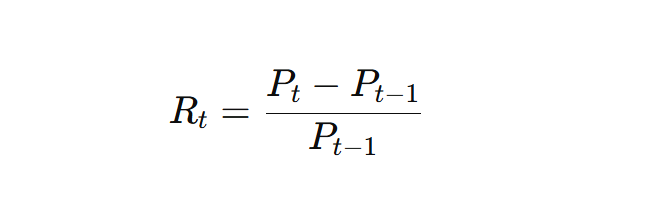


In [13]:
print(f"BP Historical Stock Prices\n {bp_history}")
print(f"Shell Historical Stock Prices\n {bp_history}")

BP Historical Stock Prices
                                 Open       High        Low      Close  \
Date                                                                    
1962-01-02 00:00:00-05:00   0.044973   0.045589   0.044973   0.044973   
1962-01-03 00:00:00-05:00   0.045178   0.045589   0.045178   0.045589   
1962-01-04 00:00:00-05:00   0.045589   0.045691   0.044767   0.044767   
1962-01-05 00:00:00-05:00   0.044767   0.044767   0.043125   0.043535   
1962-01-08 00:00:00-05:00   0.044151   0.044767   0.044151   0.044357   
...                              ...        ...        ...        ...   
2025-08-19 00:00:00-04:00  34.029999  34.240002  33.720001  33.820000   
2025-08-20 00:00:00-04:00  33.950001  34.110001  33.779999  33.880001   
2025-08-21 00:00:00-04:00  33.830002  34.060001  33.689999  34.049999   
2025-08-22 00:00:00-04:00  34.080002  34.750000  34.040001  34.740002   
2025-08-25 00:00:00-04:00  34.610001  35.000000  34.590000  34.970001   

                      

In [14]:
def daily_returns_list(stock, start_date, end_date):
    """
    Calculate daily returns for a stock between start_date and end_date.

    stock: pandas DataFrame with 'Date' and 'Close' columns
    start_date, end_date: strings in 'YYYY-MM-DD' format
    """
    # SQL query to get previous day close and current day close
    temp = ps.sqldf(f"""
        SELECT
            Date(Date) AS Date,
            Close AS close_price,
            LAG(Close, 1) OVER (ORDER BY Date) AS previous_price
        FROM {stock}
        WHERE Date BETWEEN '{start_date}' AND '{end_date}'
    """)

    # Drop the first row (since it has no previous_price)
    temp = temp.dropna(subset=['previous_price'])

    # Compute daily returns
    temp['daily_return'] = (temp['close_price'] - temp['previous_price']) / temp['previous_price']

    # Convert to list
    return temp['daily_return'].tolist()


In [15]:
def daily_return_gov_bonds():

  temp = (ps.sqldf(f"""

  SELECT
    Date(Date) as 'date',
    Yield as yield,
    LAG(Yield, 1) OVER (ORDER BY Date) as previous_yield
  FROM
    government_bond
  WHERE Date > '2025-06-01'

  """))

  r_t = 0
  p_t = temp.loc[1, 'yield']

  p_t_prev = temp.loc[1, 'previous_yield']


  r_t = (p_t - p_t_prev) / p_t_prev

  return r_t

In [16]:
def portfolio_average_daily_return(stock_dfs, weights, start_date, end_date):
    # Get daily returns for each stock
    daily_returns_lists = [daily_returns_list(stock, start_date, end_date) for stock in stock_dfs]

    # Combine weighted daily returns
    portfolio_daily_returns = [
        sum(weight * ret for weight, ret in zip(weights, daily_returns))
        for daily_returns in zip(*daily_returns_lists)
    ]

    # Return average daily return
    return sum(portfolio_daily_returns) / len(portfolio_daily_returns)

In [17]:
def portfolio_volatility(stock_dfs, weights, start_date, end_date):
    """
    Calculate annualised portfolio volatility.

    stock_dfs: list of pandas DataFrames, each with 'Date' and 'Close' columns
    weights: list of weights corresponding to each stock
    start_date, end_date: strings 'YYYY-MM-DD'
    """
    all_daily_returns = []

    for stock in stock_dfs:
        daily_returns = daily_returns_list(stock, start_date, end_date)  # uses your daily_returns_list function
        all_daily_returns.append(daily_returns)

    # Combine daily returns using weights
    portfolio_daily_returns = [
        sum(ret * w for ret, w in zip(day_returns, weights))
        for day_returns in zip(*all_daily_returns)
    ]

    # Compute annualised volatility
    volatility = statistics.stdev(portfolio_daily_returns) * math.sqrt(252)

    return volatility


In [18]:
def portfolio_cumulative_return(stock_dfs, weights, start_date, end_date):
    daily_returns_lists = [daily_returns_list(stock, start_date, end_date) for stock in stock_dfs]
    portfolio_daily_returns = [
        sum(ret * w for ret, w in zip(day_returns, weights))
        for day_returns in zip(*daily_returns_lists)
    ]
    cum_return = 1
    for r in portfolio_daily_returns:
        cum_return *= (1 + r)
    return cum_return - 1

In [19]:
def portfolio_sharpe_ratio(stock_dfs, weights, start_date, end_date, risk_free_rate=0.0):
    avg_daily = portfolio_average_daily_return(stock_dfs, weights, start_date, end_date)
    vol = portfolio_volatility(stock_dfs, weights, start_date, end_date)
    # Annualised Sharpe ratio
    return (avg_daily * 252 - risk_free_rate) / vol

In [20]:
def portfolio_max_drawdown(stock_dfs, weights, start_date, end_date):
    daily_returns_lists = [daily_returns_list(stock, start_date, end_date) for stock in stock_dfs]
    portfolio_daily_returns = [
        sum(ret * w for ret, w in zip(day_returns, weights))
        for day_returns in zip(*daily_returns_lists)
    ]
    cum_returns = []
    cum = 1
    for r in portfolio_daily_returns:
        cum *= (1 + r)
        cum_returns.append(cum)
    peak = cum_returns[0]
    max_dd = 0
    for x in cum_returns:
        if x > peak:
            peak = x
        drawdown = (peak - x) / peak
        if drawdown > max_dd:
            max_dd = drawdown
    return max_dd

In [21]:
def benchmark_average_daily_return(stock_df, start_date, end_date):
    """
    Calculate the average daily return of a single stock/index using SQL on a Pandas DataFrame.

    stock_df: pandas DataFrame with date as the index and 'Close' column
    start_date, end_date: strings in 'YYYY-MM-DD' format
    """
    # Ensure the index is a column for SQL queries
    stock_df = stock_df.reset_index().rename(columns={'index': 'Date'})
    stock_df['Date'] = pd.to_datetime(stock_df['Date'])

    # Define SQL query
    query = f"""
    WITH daily_returns AS (
        SELECT
            Date,
            Close,
            LAG(Close) OVER (ORDER BY Date) AS previous_close
        FROM stock_df
        WHERE Date BETWEEN '{start_date}' AND '{end_date}'
    )
    SELECT AVG((Close - previous_close) / previous_close) AS avg_daily_return
    FROM daily_returns
    WHERE previous_close IS NOT NULL
    """

    # Run SQL query on the DataFrame
    result = ps.sqldf(query, locals())

    return result['avg_daily_return'][0]

In [22]:
def fast_portfolio_timeseries(stock_dfs, weights, start_date, end_date, benchmark_df):
    import pandas as pd
    import numpy as np
    from functools import reduce

    # Prepare all stock DataFrames: keep 'Close', rename columns
    processed_dfs = []
    for i, df in enumerate(stock_dfs):
        temp = df[['Close']].copy()
        temp.columns = [f'Stock{i}']
        # Ensure datetime index is UTC
        if temp.index.tz is not None:
            temp = temp.tz_convert('UTC')
        else:
            temp = temp.tz_localize('UTC')
        processed_dfs.append(temp)

    # Merge all stock DataFrames on datetime index
    prices = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True, how='outer'), processed_dfs)

    # Filter by date range and fill missing values
    prices = prices[(prices.index >= start_date) & (prices.index <= end_date)]
    prices = prices.ffill().bfill()  # forward/backward-fill missing data

    # Compute daily returns and portfolio returns
    returns = prices.pct_change().fillna(0)
    port_returns = returns.dot(weights)

    # Portfolio metrics
    cum_return = (1 + port_returns).cumprod() - 1
    vol = port_returns.expanding().std()
    avg_return = port_returns.expanding().mean()
    sharpe = avg_return / vol
    running_max = cum_return.cummax()
    drawdown = (cum_return - running_max) / running_max
    max_dd = drawdown.cummin()

    # Align benchmark
    benchmark_aligned = benchmark_df[['Close']].copy()
    if benchmark_aligned.index.tz is not None:
        benchmark_aligned = benchmark_aligned.tz_convert('UTC')
    else:
        benchmark_aligned = benchmark_aligned.tz_localize('UTC')
    benchmark_aligned = benchmark_aligned[(benchmark_aligned.index >= start_date) & (benchmark_aligned.index <= end_date)]
    benchmark_aligned = benchmark_aligned.reindex(prices.index).ffill().bfill()
    benchmark_returns = benchmark_aligned.pct_change().fillna(0)

    # Compile metrics DataFrame
    metrics_df = pd.DataFrame({
        'AvgDailyReturn': avg_return,
        'Volatility': vol,
        'CumulativeReturn': cum_return,
        'Sharpe': sharpe,
        'MaxDrawdown': max_dd,
        'BenchmarkDailyReturn': benchmark_returns['Close']
    }, index=prices.index)

    return metrics_df


### Portfolio Weights Simulation

- UK Financial Markets (HSBC, Barclays) - 30%
- UK Energy Markets (BP, Shell) - 20%
- FTSE 100 - 10%
- S&P 500 - 40%

In [23]:
stock_dfs = ['bp_history', 'shell_history', 'barclays_history', 'hsbc_history', 'ftse_100_history', 's_and_p_500_history']
benchmark = 's_and_d_500_history'
weights = [0.10, 0.10, 0.15, 0.15, 0.10, 0.40]

print(f"Average daily return: {portfolio_average_daily_return(stock_dfs, weights, '2025-01-01', '2025-08-19')*100:.2f}%")
print(f"Volatility: {portfolio_volatility(stock_dfs, weights, '2025-01-01', '2025-08-19')*100:.2f}%")
print(f"Cumulative return: {portfolio_cumulative_return(stock_dfs, weights, '2025-01-01', '2025-08-19')*100:.2f}%")
print(f"Sharpe ratio: {portfolio_sharpe_ratio(stock_dfs, weights, '2025-01-01', '2025-08-19'):.2f}")
print(f"Maximum drawdown: {portfolio_max_drawdown(stock_dfs, weights, '2025-01-01', '2025-08-19')*100:.2f}%")
print(f"S&P 500 daily return: {benchmark_average_daily_return(s_and_p_500_history, '2025-01-01', '2025-08-19')*100:.2f}%")

Average daily return: 0.13%
Volatility: 16.63%
Cumulative return: 21.19%
Sharpe ratio: 1.96
Maximum drawdown: 14.96%
S&P 500 daily return: 0.07%


In [24]:
stock_df = [bp_history, shell_history, barclays_history, hsbc_history, ftse_100_history, s_and_p_500_history]
# Example usage: make sure start <= end
portfolio_ts = fast_portfolio_timeseries(stock_df, weights, '2020-01-01', '2025-08-20', s_and_p_500_history)
print(portfolio_ts)


                           AvgDailyReturn  Volatility  CumulativeReturn  \
Date                                                                      
2020-01-02 00:00:00+00:00        0.000000         NaN          0.000000   
2020-01-02 05:00:00+00:00        0.000000    0.000000          0.000000   
2020-01-03 00:00:00+00:00       -0.000434    0.000751         -0.001301   
2020-01-03 05:00:00+00:00       -0.000963    0.001224         -0.003850   
2020-01-06 00:00:00+00:00       -0.001274    0.001267         -0.006356   
...                                   ...         ...               ...   
2025-08-17 23:00:00+00:00        0.000287    0.008085          1.053953   
2025-08-18 04:00:00+00:00        0.000286    0.008084          1.051512   
2025-08-18 23:00:00+00:00        0.000286    0.008083          1.052964   
2025-08-19 04:00:00+00:00        0.000285    0.008081          1.046161   
2025-08-19 23:00:00+00:00        0.000286    0.008080          1.048858   

                        

In [ ]:
# Drop rows where BenchmarkDailyReturn is exactly zero
# metrics_clean = portfolio_ts[portfolio_ts['BenchmarkDailyReturn'] != 0]

# print(portfolio_ts)

# Save to CSV
# portfolio_ts.to_csv('portfolio_metrics.csv', index=True)

portfolio_ts_cleaned = portfolio_ts[portfolio_ts['BenchmarkDailyReturn'] != 0]
portfolio_ts_cleaned = portfolio_ts_cleaned.drop('MaxDrawdown', axis=1)

print(portfolio_ts_cleaned)

portfolio_ts_cleaned.to_csv('output-data/portfolio_metrics_cleaned.csv')



                           AvgDailyReturn  Volatility  CumulativeReturn  \
Date                                                                      
2020-01-03 05:00:00+00:00       -0.000963    0.001224         -0.003850   
2020-01-06 05:00:00+00:00       -0.000264    0.002720         -0.001604   
2020-01-07 05:00:00+00:00       -0.000504    0.002837         -0.004056   
2020-01-08 05:00:00+00:00       -0.000601    0.002510         -0.006023   
2020-01-09 05:00:00+00:00       -0.000089    0.002644         -0.001106   
...                                   ...         ...               ...   
2025-08-13 04:00:00+00:00        0.000288    0.008092          1.058392   
2025-08-14 04:00:00+00:00        0.000289    0.008089          1.065543   
2025-08-15 04:00:00+00:00        0.000287    0.008087          1.053489   
2025-08-18 04:00:00+00:00        0.000286    0.008084          1.051512   
2025-08-19 04:00:00+00:00        0.000285    0.008081          1.046161   

                        

In [ ]:
stock_dataframes = [shell_history, barclays_history, hsbc_history, ftse_100_history, s_and_p_500_history, bp_history]
stock_names = ['Shell', 'Barclays', 'HSBC', 'FTSE_100', 'S_and_P_500', 'bp_history']

for df, name in zip(stock_dataframes, stock_names):
    # Drop unwanted columns
    cleaned = df.drop(['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis=1, errors='ignore')

    # Ensure index is datetime
    cleaned.index = pd.to_datetime(cleaned.index)

    # Filter rows after 2020-01-01
    cleaned = cleaned[cleaned.index > '2020-01-01']

    # Save to CSV
    cleaned.to_csv(f'output-data/{name}_cleaned.csv')

government_bond.index = pd.to_datetime(government_bond.index)
government_bond = government_bond[government_bond.index > '2020-01-01']
government_bond.to_csv('output-data/cleaned_government_bond.csv')

uk_unemployment.index = pd.to_datetime(uk_unemployment.index)
uk_unemployment = uk_unemployment[uk_unemployment.index > '2020-01-01']
uk_unemployment.to_csv('output-data/uk_unemployment_cleaned.csv')

uk_cpi.index = pd.to_datetime(uk_cpi.index)
uk_cpi = uk_cpi[uk_cpi.index > '2020-01-01']
uk_cpi.index.name = 'Date'
uk_cpi.to_csv('output-data/uk_cpi_cleaned.csv')

gdp_data['Year'] = pd.to_datetime(gdp_data['Year'], format='%Y')
gdp_data = gdp_data[gdp_data['Year'] > '2018-01-01']
gdp_data.to_csv('output-data/uk_gdp_cleaned_usd.csv', index = False)


oil_data.index = pd.to_datetime(oil_data.index)
oil_data.index.name = 'Date'
oil_data = oil_data[oil_data.index > '2020-01-01']
oil_data.to_csv('output-data/crude_oil_data.csv')



In [27]:
shock_factor = 0.01  # +1% yield rise
yield_beta = 0.8     # estimated or assumed sensitivity

# Adjust average daily returns
shocked_return = portfolio_ts_cleaned['AvgDailyReturn'].iloc[-1] + yield_beta * shock_factor

print("Original avg daily return:", portfolio_ts_cleaned['AvgDailyReturn'].iloc[-1])
print("Shocked avg daily return:", shocked_return)

shocked_return


Original avg daily return: 0.000285175641911099
Shocked avg daily return: 0.0082851756419111


np.float64(0.0082851756419111)

In [28]:
oil_data

,WTI Crude Oil Price (USD/barrel)
Date,
2020-02-01,108.6
2020-03-01,108.6
2020-04-01,108.6
2020-05-01,108.6
2020-06-01,108.8
2020-07-01,109.2
2020-08-01,108.8
2020-09-01,109.2
2020-10-01,109.2


In [29]:
import pandas as pd

def simulate_portfolio_shock(portfolio_returns, weights, stock_dfs, shock_assets=None, shock_value=0.05):
    """
    Simulate portfolio returns under a shock scenario.

    portfolio_returns: Series of daily returns for the portfolio
    stock_dfs: list of DataFrames with 'Close' prices for each stock
    weights: portfolio weights
    shock_assets: list of indices in stock_dfs to apply the shock to
    shock_value: the daily return shock to add (e.g., 0.05 for +5%)
    """
    # Get daily returns for each stock
    daily_returns_lists = [df['Close'].pct_change().fillna(0) for df in stock_dfs]

    # Apply shock to selected assets
    if shock_assets is not None:
        for idx in shock_assets:
            daily_returns_lists[idx] = daily_returns_lists[idx] + shock_value

    # Calculate weighted portfolio returns
    portfolio_sim_returns = pd.DataFrame(daily_returns_lists).T.dot(weights)
    portfolio_sim_returns.index = portfolio_returns.index

    return portfolio_sim_returns


In [30]:
print(stock_dataframes)

[                                Open       High        Low      Close  \
Date                                                                    
1984-03-12 00:00:00-05:00   0.382727   0.384779   0.379729   0.382727   
1984-03-13 00:00:00-05:00   0.382727   0.382727   0.382727   0.382727   
1984-03-14 00:00:00-05:00   0.382727   0.382727   0.382727   0.382727   
1984-03-15 00:00:00-05:00   0.382727   0.382727   0.382727   0.382727   
1984-03-16 00:00:00-05:00   0.382727   0.382727   0.382727   0.382727   
...                              ...        ...        ...        ...   
2025-08-19 00:00:00-04:00  71.769997  72.010002  71.279999  71.449997   
2025-08-20 00:00:00-04:00  71.949997  72.305000  71.845001  72.089996   
2025-08-21 00:00:00-04:00  72.059998  72.574997  71.879997  72.489998   
2025-08-22 00:00:00-04:00  72.510002  73.449997  72.500000  73.320000   
2025-08-25 00:00:00-04:00  73.269997  74.019997  73.000000  73.820000   

                             Volume  Dividends  S

In [ ]:
import pandas as pd

# Align returns
aligned_returns = []
for df in stock_dataframes:
    returns = df['Close'].pct_change()
    returns = returns.reindex(portfolio_ts_cleaned.index).fillna(0)
    aligned_returns.append(returns)

returns_df = pd.concat(aligned_returns, axis=1)
returns_df.columns = ['Shell','Barclays','HSBC','FTSE_100','SP500','BP']

# Apply shock to financials (Barclays + HSBC)
returns_df[['Barclays','HSBC']] += 0.0005  # multiply by 1 + 0.05


# Portfolio weighted returns
portfolio_sim_returns = returns_df.dot(weights)

portfolio_sim_returns_df = portfolio_sim_returns.to_frame(name='SimulatedPortfolioReturn')
portfolio_sim_returns_df.to_csv('output-data/simulated_portfolio_returns.csv')



In [ ]:
# Make a copy to avoid modifying original
sim_returns_df = returns_df.copy()

# Apply a 5% relative increase to financials
sim_returns_df[['Barclays','HSBC']] *= 1.05  # multiply, not add

# Check min/max of each column
print(sim_returns_df[['Barclays','HSBC']].min(), sim_returns_df[['Barclays','HSBC']].max())

# Compute weighted portfolio returns
portfolio_sim_returns = sim_returns_df.dot(weights)

# Check min/max
print(portfolio_sim_returns.min(), portfolio_sim_returns.max())

# Save CSV
portfolio_sim_returns.to_csv('output-data/simulated_portfolio_returns.csv')


Barclays    0.000525
HSBC       -0.107061
dtype: float64 Barclays    0.000525
HSBC        0.109390
dtype: float64
-0.1098906968593365 0.12378896562105537


In [33]:
portfolio_sim_returns_df

,SimulatedPortfolioReturn
Date,
2020-01-03 05:00:00+00:00,0.005118
2020-01-06 05:00:00+00:00,0.011728
2020-01-07 05:00:00+00:00,-0.006416
2020-01-08 05:00:00+00:00,-0.006999
2020-01-09 05:00:00+00:00,0.003093
...,...
2025-08-13 04:00:00+00:00,0.003958
2025-08-14 04:00:00+00:00,0.005698
2025-08-15 04:00:00+00:00,-0.001271


In [ ]:
combined_df = pd.concat([
    portfolio_ts_cleaned['AvgDailyReturn'],
    portfolio_sim_returns_df
], axis = 1)

combined_df.columns=['OriginalAvgDailyReturns', 'SimulatedAvgDailyReturns']

combined_df.to_csv('output-data/portfolio_simulation.csv')

combined_df

,OriginalAvgDailyReturns,SimulatedAvgDailyReturns
Date,,
2020-01-03 05:00:00+00:00,-0.000963,0.005118
2020-01-06 05:00:00+00:00,-0.000264,0.011728
2020-01-07 05:00:00+00:00,-0.000504,-0.006416
2020-01-08 05:00:00+00:00,-0.000601,-0.006999
2020-01-09 05:00:00+00:00,-0.000089,0.003093
...,...,...
2025-08-13 04:00:00+00:00,0.000288,0.003958
2025-08-14 04:00:00+00:00,0.000289,0.005698
2025-08-15 04:00:00+00:00,0.000287,-0.001271


In [35]:
portfolio_ts_cleaned

,AvgDailyReturn,Volatility,CumulativeReturn,Sharpe,BenchmarkDailyReturn
Date,,,,,
2020-01-03 05:00:00+00:00,-0.000963,0.001224,-0.003850,-0.786988,-0.007060
2020-01-06 05:00:00+00:00,-0.000264,0.002720,-0.001604,-0.097227,0.003533
2020-01-07 05:00:00+00:00,-0.000504,0.002837,-0.004056,-0.177806,-0.002803
2020-01-08 05:00:00+00:00,-0.000601,0.002510,-0.006023,-0.239441,0.004902
2020-01-09 05:00:00+00:00,-0.000089,0.002644,-0.001106,-0.033679,0.006655
...,...,...,...,...,...
2025-08-13 04:00:00+00:00,0.000288,0.008092,1.058392,0.035601,0.003230
2025-08-14 04:00:00+00:00,0.000289,0.008089,1.065543,0.035740,0.000303
2025-08-15 04:00:00+00:00,0.000287,0.008087,1.053489,0.035470,-0.002897


In [ ]:
import pandas as pd
import pandasql as ps
from datetime import datetime, timedelta

# Calculate the date two months ago
two_months_ago = (datetime.today() - pd.DateOffset(months=2)).strftime('%Y-%m-%d')

query = f"""
SELECT
  Date,
  AvgDailyReturn,
  AvgDailyReturn * 1.05 AS AvgDailyReturnSimulation
FROM portfolio_ts_cleaned
WHERE Date >= '{two_months_ago}'
ORDER BY Date
"""

df_new = ps.sqldf(query, locals())

df_new['Date'] = df_new['Date'].astype(str)
df_new.to_csv('output-data/portfolio_simulation_1.csv', index=False)


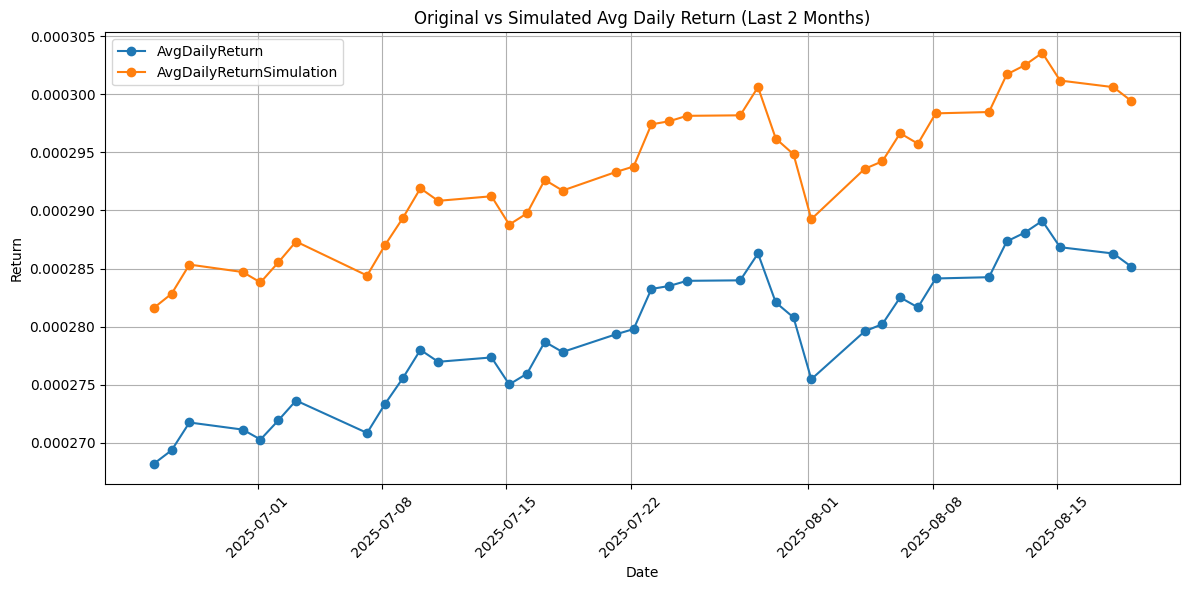

In [37]:
import matplotlib.pyplot as plt

# Ensure Date is datetime type for proper plotting
df_new['Date'] = pd.to_datetime(df_new['Date'])

plt.figure(figsize=(12, 6))

# Plot original
plt.plot(df_new['Date'], df_new['AvgDailyReturn'], label='AvgDailyReturn', marker='o')

# Plot simulated
plt.plot(df_new['Date'], df_new['AvgDailyReturnSimulation'], label='AvgDailyReturnSimulation', marker='o')

plt.xlabel('Date')
plt.ylabel('Return')
plt.title('Original vs Simulated Avg Daily Return (Last 2 Months)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate dates for readability
plt.tight_layout()
plt.show()


In [38]:
portfolio_ts_cleaned

,AvgDailyReturn,Volatility,CumulativeReturn,Sharpe,BenchmarkDailyReturn
Date,,,,,
2020-01-03 05:00:00+00:00,-0.000963,0.001224,-0.003850,-0.786988,-0.007060
2020-01-06 05:00:00+00:00,-0.000264,0.002720,-0.001604,-0.097227,0.003533
2020-01-07 05:00:00+00:00,-0.000504,0.002837,-0.004056,-0.177806,-0.002803
2020-01-08 05:00:00+00:00,-0.000601,0.002510,-0.006023,-0.239441,0.004902
2020-01-09 05:00:00+00:00,-0.000089,0.002644,-0.001106,-0.033679,0.006655
...,...,...,...,...,...
2025-08-13 04:00:00+00:00,0.000288,0.008092,1.058392,0.035601,0.003230
2025-08-14 04:00:00+00:00,0.000289,0.008089,1.065543,0.035740,0.000303
2025-08-15 04:00:00+00:00,0.000287,0.008087,1.053489,0.035470,-0.002897


In [41]:
import pandas as pd
import pandasql as ps

# 1. Load and prepare your data
df = portfolio_ts_cleaned.copy()
df.index = pd.to_datetime(df.index)  # ensure Date column is datetime

# 2. Filter last two months
two_months_ago = df.index.max() - pd.Timedelta(days=60)
df_window = df[df.index >= two_months_ago].copy()

# 3. Add day index (equivalent to ROW_NUMBER)
df_window['day_index'] = (df_window.index - df_window.index.min()).days + 1

# 4. Define daily acceleration factor scaled by financial exposure
financial_exposure = 0.3   # 30% exposure to financial sector
base_acceleration = 0.001  # base daily acceleration
daily_acceleration = base_acceleration * financial_exposure

# 5. Compute accelerated returns using pandasql
query = f"""
SELECT
    Date,
    AvgDailyReturn,
    AvgDailyReturn + ({daily_acceleration} * day_index) AS Accelerated_Return
FROM df_window
ORDER BY Date
"""

df_new = ps.sqldf(query, locals())

# 6. View results
print(df_new.head())


                         Date  AvgDailyReturn  Accelerated_Return
0  2025-06-20 04:00:00.000000        0.000265            0.000565
1  2025-06-23 04:00:00.000000        0.000264            0.001464
2  2025-06-24 04:00:00.000000        0.000268            0.001768
3  2025-06-25 04:00:00.000000        0.000268            0.002068
4  2025-06-26 04:00:00.000000        0.000269            0.002369


In [42]:
simulation_df = portfolio_ts_cleaned
simulation_df



,AvgDailyReturn,Volatility,CumulativeReturn,Sharpe,BenchmarkDailyReturn
Date,,,,,
2020-01-03 05:00:00+00:00,-0.000963,0.001224,-0.003850,-0.786988,-0.007060
2020-01-06 05:00:00+00:00,-0.000264,0.002720,-0.001604,-0.097227,0.003533
2020-01-07 05:00:00+00:00,-0.000504,0.002837,-0.004056,-0.177806,-0.002803
2020-01-08 05:00:00+00:00,-0.000601,0.002510,-0.006023,-0.239441,0.004902
2020-01-09 05:00:00+00:00,-0.000089,0.002644,-0.001106,-0.033679,0.006655
...,...,...,...,...,...
2025-08-13 04:00:00+00:00,0.000288,0.008092,1.058392,0.035601,0.003230
2025-08-14 04:00:00+00:00,0.000289,0.008089,1.065543,0.035740,0.000303
2025-08-15 04:00:00+00:00,0.000287,0.008087,1.053489,0.035470,-0.002897


In [43]:
import pandas as pd
import numpy as np

def simulate_acceleration_quarter(df, quarter='Q2', k=0.000001, last_days=None):
    """
    Simulate linearly accelerating returns starting at a chosen quarter
    of the (optional) last_days slice.

    Parameters:
    - df: DataFrame with datetime index and 'AvgDailyReturn'
    - quarter: 'Q1', 'Q2', 'Q3', 'Q4'
    - k: daily acceleration factor
    - last_days: int, number of last rows to include; if None, use full df

    Returns:
    - DataFrame with 'AvgDailyReturn', 'day_index', and 'SimulatedAvgDailyReturn'
    """
    df_copy = df[['AvgDailyReturn']].copy()
    df_copy.index = pd.to_datetime(df_copy.index)

    # Optionally slice the last N days
    if last_days is not None:
        df_copy = df_copy.iloc[-last_days:].copy()

    n = len(df_copy)

    # Map quarters to fraction of the slice
    quarter_map = {
        'Q1': 0.0,
        'Q2': 0.25,
        'Q3': 0.5,
        'Q4': 0.75
    }

    if quarter not in quarter_map:
        raise ValueError("quarter must be 'Q1', 'Q2', 'Q3', or 'Q4'")

    start_idx = int(np.floor(n * quarter_map[quarter]))

    # Initialize day_index
    df_copy['day_index'] = 0

    # Apply day_index for the accelerating portion
    df_copy.iloc[start_idx:, df_copy.columns.get_loc('day_index')] = np.arange(1, n - start_idx + 1)

    # Compute simulated returns
    df_copy['SimulatedAvgDailyReturn'] = df_copy['AvgDailyReturn'] + df_copy['day_index'] * k

    return df_copy


                           AvgDailyReturn  day_index  SimulatedAvgDailyReturn
Date                                                                         
2025-07-23 04:00:00+00:00        0.000283          0                 0.000283
2025-07-24 04:00:00+00:00        0.000284          0                 0.000284
2025-07-25 04:00:00+00:00        0.000284          0                 0.000284
2025-07-28 04:00:00+00:00        0.000284          0                 0.000284
2025-07-29 04:00:00+00:00        0.000286          0                 0.000286
2025-07-30 04:00:00+00:00        0.000282          1                 0.000283
2025-07-31 04:00:00+00:00        0.000281          2                 0.000283
2025-08-01 04:00:00+00:00        0.000275          3                 0.000278
2025-08-04 04:00:00+00:00        0.000280          4                 0.000284
2025-08-05 04:00:00+00:00        0.000280          5                 0.000285
2025-08-06 04:00:00+00:00        0.000283          6            

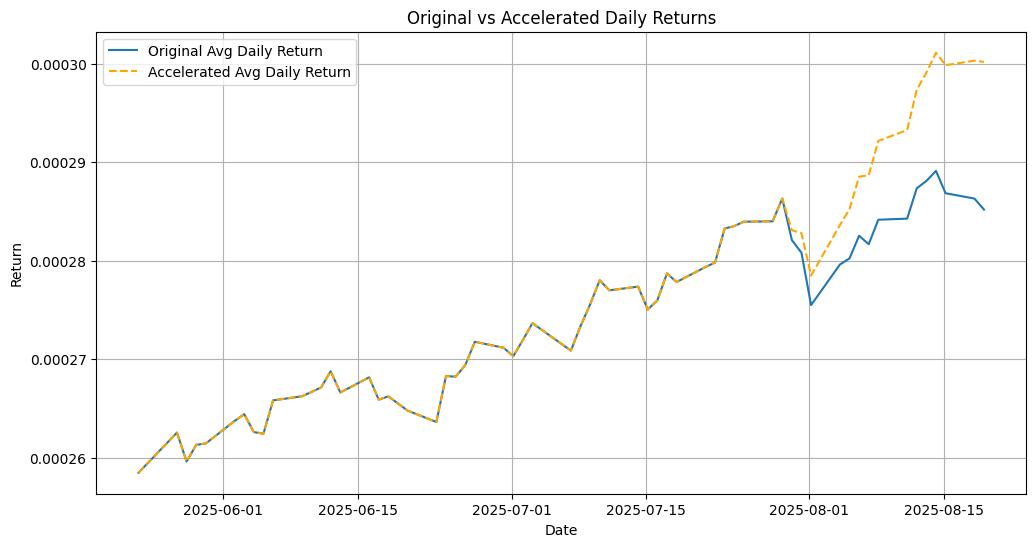

In [ ]:
# Apply acceleration starting at the midpoint (Q2) with a small k
df_simulated = simulate_acceleration_quarter(portfolio_ts_cleaned, quarter='Q4', k=0.000001, last_days=60)

print(df_simulated.tail(20))

plt.figure(figsize=(12, 6))
plt.plot(df_simulated.index, df_simulated['AvgDailyReturn'], label='Original Avg Daily Return')
plt.plot(df_simulated.index, df_simulated['SimulatedAvgDailyReturn'], label='Accelerated Avg Daily Return', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('Original vs Accelerated Daily Returns')
plt.legend()
plt.grid(True)
plt.show()

df_simulated.to_csv('output-data/portfolio_simulation.csv')
